In [ ]:
# ! pip install transformers[torch] datasets accelerate -U evaluate -q

In [2]:
import os
import pandas as pd
import numpy as np
from datasets import Dataset
import torch

In [3]:
ar = pd.read_csv('NorthArabicDataset.csv').rename(columns={'class': 'label'})

In [4]:
ar.head()

,text,label
0,كيفاش واش كتطلع هاكدة,morocco
1,فنان يحب فنو ويدافع عليه,tunisia
2,يدافع على الثقافة وهو ماهو مثقف,tunisia
3,عطني ديك الصينية,morocco
4,إيه بالصح ماركة فرنساز,algeria


In [5]:
ar.label.value_counts()

label
algeria    11014
tunisia     6341
morocco     6070
egypt       4591
Name: count, dtype: int64

In [6]:
labels = ['algeria','tunisia','morocco','egypt']

# Creating lb2id (label to ID) dictionary
label2id = {label: idx for idx, label in enumerate(labels)}

# Creating id2lb (ID to label) dictionary
id2label = {idx: label for idx, label in enumerate(labels)}

# Display the dictionaries
print("lb2id:", label2id)
print("id2lb:", id2label)

lb2id: {'algeria': 0, 'tunisia': 1, 'morocco': 2, 'egypt': 3}
id2lb: {0: 'algeria', 1: 'tunisia', 2: 'morocco', 3: 'egypt'}


In [25]:
ar['label'] = ar['label'].map(label2id)

In [26]:
ar.head()

,text,label
0,كيفاش واش كتطلع هاكدة,2
1,فنان يحب فنو ويدافع عليه,1
2,يدافع على الثقافة وهو ماهو مثقف,1
3,عطني ديك الصينية,2
4,إيه بالصح ماركة فرنساز,0


WordCLoud

In [27]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import arabic_reshaper 
from bidi.algorithm import get_display
from wordcloud import WordCloud, ImageColorGenerator
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
import nltk

In [28]:
def extract_non_important_words(texts, threshold=0.2, top_n=10):
    """
    Extract non-important words based on TF-IDF analysis.

    Parameters:
    - texts (list): List of Arabic texts.
    - threshold (float): Threshold for considering words as non-important.
    - top_n (int): Number of top non-important words to return.

    Returns:
    - list: Top non-important words for each text.
    """

    # Tokenize and preprocess the text
    # tokens_list = [word_tokenize(text, language='arabic') for text in texts]
# 
    # Create a DataFrame with the text and tokens
    # df = pd.DataFrame({'text': texts, 'tokens': tokens_list})

    # TF-IDF Vectorization
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(texts)

    # Extracting Feature Names and TF-IDF Scores
    feature_names = tfidf_vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_matrix.toarray()

    # Creating a DataFrame with Feature Names and TF-IDF Scores
    tfidf_df = pd.DataFrame(tfidf_scores, columns=feature_names)

    # Calculate average TF-IDF scores across all documents
  # Calculate average TF-IDF scores across all documents
    avg_tfidf = tfidf_df.mean()

    # Identify non-important words based on the threshold
    non_important_words = [word for word in avg_tfidf.index if avg_tfidf[word]]

    # Sort non-important words by their average TF-IDF scores (optional)
    non_important_words = sorted(non_important_words, key=lambda word: avg_tfidf[word])

    # return non_important_words[:top_n]
    return non_important_words[::-1][:top_n]

non_important_words = extract_non_important_words(ar['text'], top_n=25)
non_important_words

['في',
 'ما',
 'من',
 'على',
 'لي',
 'يا',
 'لا',
 'أنا',
 'الله',
 'واش',
 'هو',
 'ولا',
 'والله',
 'واحد',
 'كل',
 'هي',
 'ربي',
 'تاع',
 'وش',
 'حتى',
 'كي',
 'مع',
 'كان',
 'قالت',
 'انا']

In [31]:
def get_stopwords_list(stop_file_path):
    """load stop words """
    
    with open(stop_file_path, 'r', encoding="utf-8") as f:
        stopwords = f.readlines()
        stop_set = set(m.strip() for m in stopwords)
        return list(frozenset(stop_set))

stopwords_path = "arabic-1.txt"
stopwords = get_stopwords_list(stopwords_path)
stopwords[:10]

['', 'على', 'ماذا', 'ثمان', 'ت', 'حين', 'الى', 'ريث', 'الذين', 'قليل']

In [41]:
font_file = 'arial.ttf'
def remove_words_from_text(text, words_to_remove):
    for word in words_to_remove:
        text = text.replace(word, '')
    return text

def column_to_wordcloud(df, column, font_file, stopwords): 
    """
    Parameters:
      df: the dataframe that contains the column 
      column: the name of the column that contains the text 
      font_file: the path to the font file for Arabic characters 
      stopwords: a list of words to exclude from the wordcloud

    Outputs:
        None. The function only displays the word cloud image.
    """
    # tmp = remove_words_from_series(df[column], stopwords + non_important_words)
    words = [arabic_reshaper.reshape(t) for t in non_important_words]
    text = " ".join(arabic_reshaper.reshape(t) for t in df[column].dropna())
    text = remove_words_from_text(text, words)
    # create and display the wordcloud
    wordcloud = WordCloud(font_path=font_file, width = 3500, height = 2000, random_state=1, background_color='white', colormap='Set2', collocations=False,
                      stopwords = stopwords + non_important_words).generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

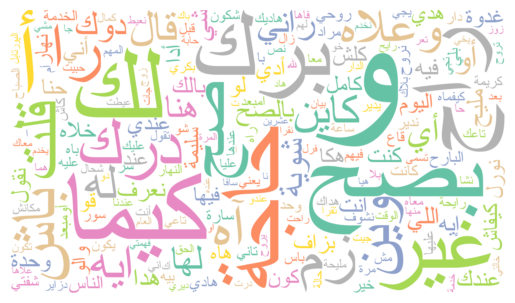

In [42]:
column_to_wordcloud(ar[ar['label'] == 0],"text",font_file,stopwords)

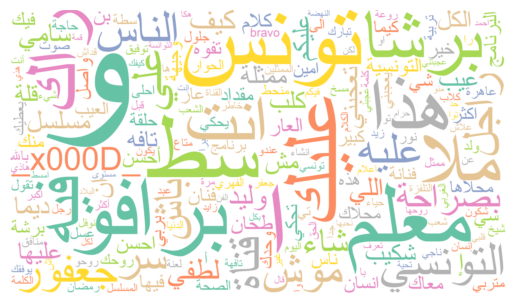

In [43]:
column_to_wordcloud(ar[ar['label'] == 1],"text",font_file,stopwords)

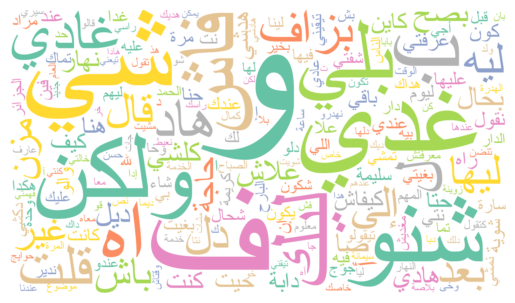

In [44]:
column_to_wordcloud(ar[ar['label'] == 2],"text",font_file,stopwords)

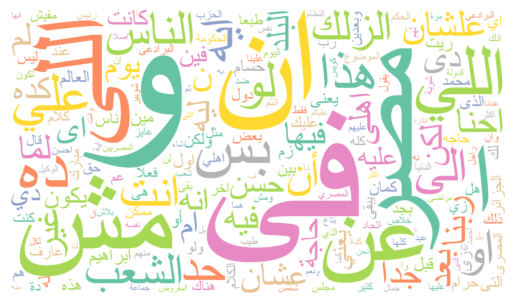

In [45]:
column_to_wordcloud(ar[ar['label'] == 3],"text",font_file,stopwords)

# Classical approach

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    ar['text'], ar['label'], test_size=0.2, random_state=42
)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(train_data)
tfidf_test = tfidf_vectorizer.transform(test_data)

# Support Vector Machine (SVM) Classifier
svm_classifier = SVC(kernel='linear', C=1)
svm_classifier.fit(tfidf_train, train_labels)

# Predictions
predictions = svm_classifier.predict(tfidf_test)

# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
classification_rep = classification_report(test_labels, predictions)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)


Accuracy: 0.8968593861527481
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90      2213
           1       0.94      0.93      0.93      1281
           2       0.90      0.78      0.84      1191
           3       0.96      0.87      0.92       919

    accuracy                           0.90      5604
   macro avg       0.91      0.88      0.90      5604
weighted avg       0.90      0.90      0.90      5604



# LSTM model

In [46]:
!pip install tkseem -q
!pip install tnkeeh -q

In [47]:
import numpy as np
import tkseem as tk
import tnkeeh as tn
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import GRU, Embedding, Dense, Input, Dropout, Bidirectional

2023-12-16 18:00:16.089441: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-16 18:00:16.089502: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-16 18:00:16.091052: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-16 18:00:16.099341: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [48]:
# Specify the directory where you want to save the text files
filename = 'train.txt'

# Iterate through each element and save as a text file
for index, row in ar.iterrows():    
    # Save the element to a text file
    with open(filename, 'a') as file:
        file.write(str(row['text']) + '\n')
print("Text files saved successfully.")

Text files saved successfully.


In [49]:
tokenizer = tk.SentencePieceTokenizer()
tokenizer.train('train.txt')


Training SentencePiece ...


sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: train.txt
  input_format: 
  model_prefix: 
  model_type: BPE
  vocab_size: 10000
  self_test_sample_size: 0
  character_coverage: 1
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  pretokenization_delimiter: 
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: -1
  eos_id: -1
  pad_id: 1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
  enable_differential_privacy: 0
  differential_privacy_noise_level: 0
  differential_p

In [50]:
def preprocess(tokenizer, data, labels):
    X = tokenizer.encode_sentences(data)
    y = np.array([int(lbl) for lbl in labels])
    return X, y

�يه
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=36 size=4760 all=68298 active=3647 piece=▁امتى
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=36 size=4780 all=68329 active=3678 piece=▁سلعة
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=36 size=4800 all=68363 active=3712 piece=▁!!!!!
bpe_model_trainer.cc(159) LOG(INFO) Updating active symbols. max_freq=36 min_freq=20
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=36 size=4820 all=68365 active=3420 piece=▁صاحبي
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=36 size=4840 all=68362 active=3417 piece=▁السوجي
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=36 size=4860 all=68352 active=3407 piece=▁وابراهيم
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=34 size=4880 all=68536 active=3591 piece=روي
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=34 size=4900 all=68728 active=3783 piece=▁كأ
bpe_model_trainer.cc(159) LOG(INFO) Updating active symbols. max_freq=34 min_freq=18
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=34 size=4920 a

In [51]:
# process training data
train_data, test_data, train_labels, test_labels = train_test_split(
    ar['text'], ar['label'], test_size=0.2, random_state=42
)

X_train, y_train = preprocess(tokenizer, train_data, train_labels)

# process test data
X_test, y_test = preprocess(tokenizer, test_data, test_labels)

ece=فقر
bpe_model_trainer.cc(159) LOG(INFO) Updating active symbols. max_freq=18 min_freq=12
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=18 size=7820 all=75047 active=3830 piece=▁el
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=18 size=7840 all=75115 active=3898 piece=بيرو
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=18 size=7860 all=75201 active=3984 piece=ضربة
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=18 size=7880 all=75269 active=4052 piece=وليه
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=18 size=7900 all=75322 active=4105 piece=▁اوف
bpe_model_trainer.cc(159) LOG(INFO) Updating active symbols. max_freq=18 min_freq=12
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=18 size=7920 all=75374 active=3814 piece=▁رضا
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=18 size=7940 all=75405 active=3845 piece=▁كتو
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=18 size=7960 all=75453 active=3893 piece=▁نوك
bpe_model_trainer.cc(268) LOG(INFO) Added: freq=18 size=7980 all=75529 

In [52]:
max_length = max(len(data) for data in train_data)


In [53]:
model = Sequential()
model.add(Embedding(tokenizer.vocab_size, 32))
model.add(Bidirectional(GRU(units = 32)))
model.add(Dense(32, activation = 'tanh'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax')) 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

2023-12-16 18:00:27.967070: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-16 18:00:27.969135: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-16 18:00:27.971057: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

InternalError: cudaGetDevice() failed. Status: out of memory

In [ ]:
history = model.fit(X_train, y_train, epochs = 12, validation_split = 0.1,  batch_size= 128, shuffle = True)

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy}")
# You can save the model for future use
model.save('arabic_dialect_classifier_gru_lstm.h5')

In [ ]:
def classify(sentence):
  sequence = tokenizer.encode_sentences([sentence], out_length = max_length)[0]
  pred = model.predict(sequence)[0][0]
  print(pred)

In [ ]:
classify("سيئة جدا جدا")
classify("رائعة جدا")

# Bert Model

In [ ]:
ard = ard.train_test_split(test_size=0.3)

In [9]:
model_id = 'CAMeL-Lab/bert-base-arabic-camelbert-da'

In [11]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(model_id)

def tokenize_function(examples):
    return tokenizer(examples["text"],max_length=512, padding="max_length", truncation=True)

tokenized_datasets = ard.map(tokenize_function, batched=True)

In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
small_train_dataset = tokenized_datasets["train"].shuffle(seed=42)
small_eval_dataset = tokenized_datasets["test"].shuffle(seed=42)

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(model_id, num_labels=len(labels), id2label=id2label, label2id=label2id)

In [19]:
import numpy as np
import evaluate

metric = evaluate.load("accuracy")
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

ModuleNotFoundError: No module named 'evaluate'

In [ ]:
training_args = TrainingArguments(
    output_dir="northafrica-arabizi-dialect",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    # device=2
    # push_to_hub=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    # device=0
)

trainer.train()

In [ ]:
trainer.evaluate()

In [18]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
labels = ['algeria','tunisia','morocco','egypt']

# Creating lb2id (label to ID) dictionary
label2id = {label: idx for idx, label in enumerate(labels)}

# Creating id2lb (ID to label) dictionary
id2label = {idx: label for idx, label in enumerate(labels)}

# Display the dictionaries
print("lb2id:", label2id)
print("id2lb:", id2label)
model_id = 'Oelbourki/northafrica-arabizi-dialect-classifier'
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForSequenceClassification.from_pretrained(model_id, num_labels=len(labels), id2label=id2label, label2id=label2id)

lb2id: {'algeria': 0, 'tunisia': 1, 'morocco': 2, 'egypt': 3}
id2lb: {0: 'algeria', 1: 'tunisia', 2: 'morocco', 3: 'egypt'}


tokenizer_config.json: 100%|███████████████████████████████████████████████████████| 1.29k/1.29k [00:00<00:00, 6.54MB/s]
vocab.txt: 100%|█████████████████████████████████████████████████████████████████████| 305k/305k [00:00<00:00, 1.86MB/s]
tokenizer.json: 100%|████████████████████████████████████████████████████████████████| 776k/776k [00:00<00:00, 2.38MB/s]
config.json: 100%|█████████████████████████████████████████████████████████████████████| 930/930 [00:00<00:00, 5.31MB/s]
model.safetensors: 100%|█████████████████████████████████████████████████████████████| 436M/436M [00:19<00:00, 22.3MB/s]


In [13]:
from transformers import pipeline
clc = pipeline('text-classification', model=model, tokenizer=tokenizer)

In [15]:
clc('برشا')

[{'label': 'tunisia', 'score': 0.9990217685699463}]

In [16]:
model.push_to_hub("northafrica-arabizi-dialect-classifier")

model.safetensors: 100%|█████████████████████████████████████████████████████████████| 436M/436M [00:19<00:00, 22.0MB/s]


CommitInfo(commit_url='https://huggingface.co/Oelbourki/northafrica-arabizi-dialect-classifier/commit/7bd46ac2f364b43c6a7a6005e53338102ada3635', commit_message='Upload BertForSequenceClassification', commit_description='', oid='7bd46ac2f364b43c6a7a6005e53338102ada3635', pr_url=None, pr_revision=None, pr_num=None)

In [17]:
tokenizer.push_to_hub("northafrica-arabizi-dialect-classifier")

CommitInfo(commit_url='https://huggingface.co/Oelbourki/northafrica-arabizi-dialect-classifier/commit/78fa18fdc0ac4f3dd3af0f130b4181767d2f4828', commit_message='Upload tokenizer', commit_description='', oid='78fa18fdc0ac4f3dd3af0f130b4181767d2f4828', pr_url=None, pr_revision=None, pr_num=None)